In [4]:
import warnings
warnings.filterwarnings("ignore")

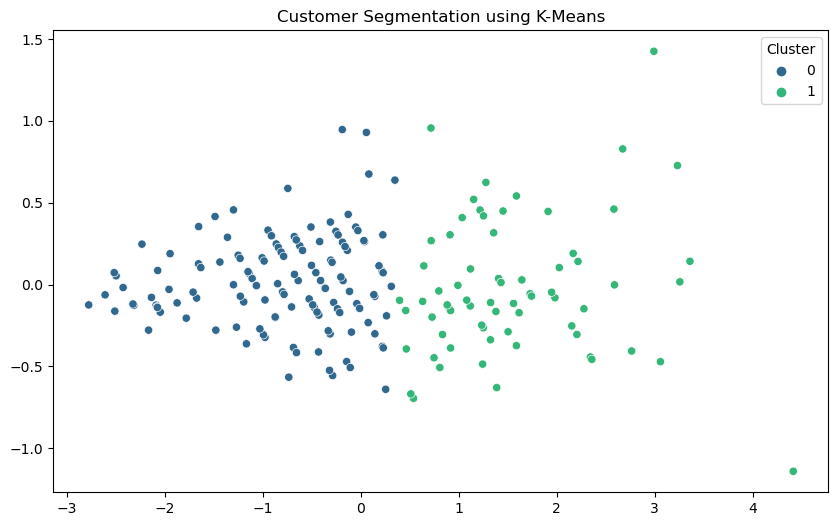

Optimal Number of Clusters: 2
Davies-Bouldin Index: 0.6298644531019864


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA

customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

customer_transactions = transactions.groupby("CustomerID").agg({
    "TotalValue": "sum",
    "Quantity": "sum"
}).reset_index()

customer_data = customers.merge(customer_transactions, on="CustomerID", how="left").fillna(0)

customer_data = pd.get_dummies(customer_data, columns=["Region"], drop_first=True)

scaler = StandardScaler()
numeric_cols = ["TotalValue", "Quantity"]
customer_data[numeric_cols] = scaler.fit_transform(customer_data[numeric_cols])

db_scores = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(customer_data[numeric_cols])
    db_scores.append(davies_bouldin_score(customer_data[numeric_cols], clusters))

optimal_k = k_range[np.argmin(db_scores)]
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_data["Cluster"] = kmeans.fit_predict(customer_data[numeric_cols])

pca = PCA(n_components=2)
customer_data_pca = pca.fit_transform(customer_data[numeric_cols])
plt.figure(figsize=(10,6))
sns.scatterplot(x=customer_data_pca[:,0], y=customer_data_pca[:,1], hue=customer_data["Cluster"], palette="viridis")
plt.title("Customer Segmentation using K-Means")
plt.show()

customer_data.to_csv("Customer_Segmentation.csv", index=False)

print(f"Optimal Number of Clusters: {optimal_k}")
print(f"Davies-Bouldin Index: {min(db_scores)}")
